In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

from keras.utils import to_categorical
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

from sklearn.model_selection import train_test_split

np.random.seed(1)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train_images = []       
train_labels = []
shape = (200,200)  
train_path = r'D:\Deep Learning\Data\train'

for filename in os.listdir(r'D:\Deep Learning\Data\train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        train_images.append(img)

# Converting labels into One Hot encoded sparse matrix
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)

# Splitting Training data into train and validation dataset
x_train,x_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)


In [5]:
test_images = []
test_labels = []
shape = (200,200)
test_path = r'D:\Deep Learning\Data\test'

for filename in os.listdir(r'D:\Deep Learning\Data\test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
test_images = np.array(test_images)

[1 0 0 0]


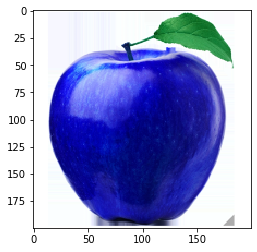

In [6]:
print(train_labels[0])
plt.imshow(train_images[0])

[1 0 0 0]


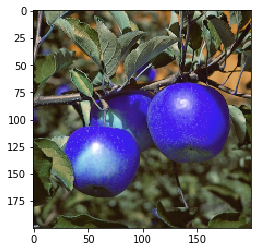

In [7]:
print(train_labels[4])
plt.imshow(train_images[4])

In [8]:
from keras.models import Sequential

In [9]:
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(200,200,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 196, 196, 30)      8670      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 98, 98, 30)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 30)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 46, 46, 30)        8

In [11]:
history = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 19s 4s/step - loss: 3.0475 - acc: 0.1667 - val_loss: 2.0802 - val_acc: 0.2667
Epoch 2/50
4/4 [==============================] - 17s 4s/step - loss: 2.3061 - acc: 0.3611 - val_loss: 1.0055 - val_acc: 0.5167
Epoch 3/50
4/4 [==============================] - 17s 4s/step - loss: 1.3058 - acc: 0.4167 - val_loss: 1.5831 - val_acc: 0.3833
Epoch 4/50
4/4 [==============================] - 18s 4s/step - loss: 1.4389 - acc: 0.3722 - val_loss: 1.2055 - val_acc: 0.4167
Epoch 5/50
4/4 [==============================] - 17s 4s/step - loss: 1.0671 - acc: 0.5056 - val_loss: 1.1108 - val_acc: 0.6333
Epoch 6/50
4/4 [==============================] - 17s 4s/step - loss: 0.9125 - acc: 0.6667 - val_loss: 0.7748 - val_acc: 0.7833
Epoch 7/50
4/4 [==============================] - 16s 4s/step - loss: 0.9018 - acc: 0.7111 - val_loss: 1.0437 - val_acc: 0.6667
Epoch 8/50
4/4 [==============================] - 16s 4s/step - loss: 0.7382 - acc: 0.6722 - val_loss: 0

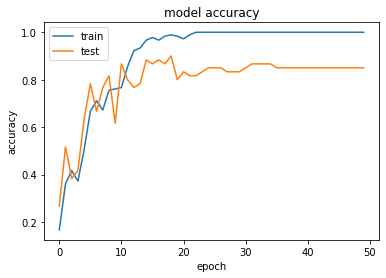

In [12]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

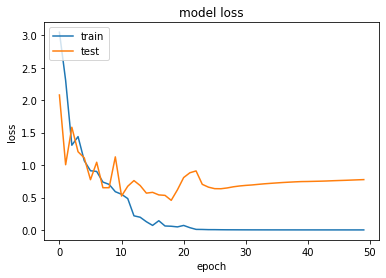

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
evaluate = model.evaluate(x_val,y_val)
print(evaluate)

2/2 [==============================] - 1s 641ms/step - loss: 0.7760 - acc: 0.8500
[0.7760129570960999, 0.8500000238418579]


In [15]:
checkImage = test_images[0:1]
checklabel = test_labels[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'apple',1:'banana',2:'mixed',3:'orange'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

1/1 [==============================] - 0s 235ms/step
Actual :-  ['apple']
Predicted :-  apple


In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predict on the validation set
y_pred = model.predict(x_val)

# Convert one-hot encoded labels back to class indices
y_true = np.argmax(y_val, axis=1)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(confusion)

2/2 [==============================] - 2s 698ms/step
Confusion Matrix:
[[18  2  1  1]
 [ 1 15  0  2]
 [ 0  1  2  0]
 [ 1  0  0 16]]


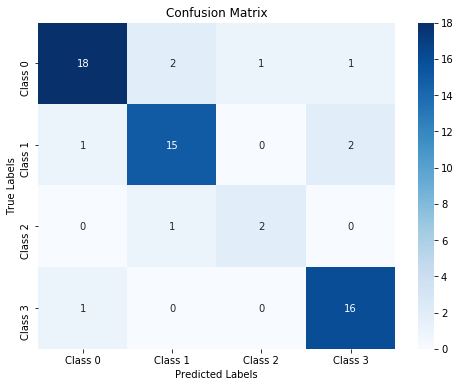

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Get the number of classes (assuming 4 in your case)
num_classes = 4

# Create a figure and axis for the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

# Set the class labels as ticks on the axis
class_labels = [f'Class {i}' for i in range(num_classes)]
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Show the heatmap
plt.show()


In [25]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have x_train and y_train as your training data
# You can convert the one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)

# Create and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train.reshape(x_train.shape[0], -1), y_train_indices)

# Predict on the validation data
y_val_indices = np.argmax(y_val, axis=1)
y_val_pred = logistic_model.predict(x_val.reshape(x_val.shape[0], -1))

# Evaluate the model
accuracy = accuracy_score(y_val_indices, y_val_pred)
confusion = confusion_matrix(y_val_indices, y_val_pred)
classification_rep = classification_report(y_val_indices, y_val_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.75
Confusion Matrix:
[[18  2  0  2]
 [ 0 16  0  2]
 [ 1  1  1  0]
 [ 2  4  1 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.70      0.89      0.78        18
           2       0.50      0.33      0.40         3
           3       0.71      0.59      0.65        17

    accuracy                           0.75        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.75      0.75      0.74        60



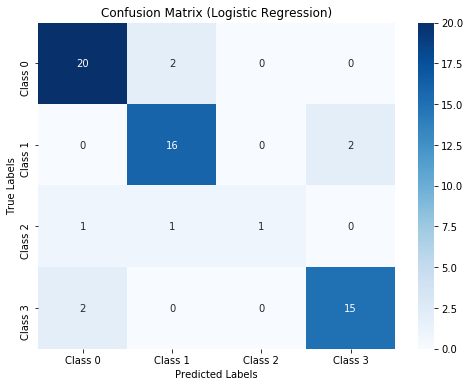

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and evaluated the logistic regression model
# You should have y_val_indices and y_val_pred as your true labels and predictions

# Create the confusion matrix
confusion = confusion_matrix(y_val_indices, y_val_pred)

# Get the number of classes (adjust if needed)
num_classes = 4

# Create a figure and axis for the heatmap
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Set axis labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Logistic Regression)')

# Set the class labels as ticks on the axis
class_labels = [f'Class {i}' for i in range(num_classes)]
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)

# Show the heatmap
plt.show()


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you have x_train and y_train as your training data
# You can convert the one-hot encoded labels to class indices
y_train_indices = np.argmax(y_train, axis=1)

# Create and train the Decision Tree classifier
decision_tree_model = DecisionTreeClassifier(random_state=1)
decision_tree_model.fit(x_train.reshape(x_train.shape[0], -1), y_train_indices)

# Predict on the validation data
y_val_indices = np.argmax(y_val, axis=1)
y_val_pred = decision_tree_model.predict(x_val.reshape(x_val.shape[0], -1))

# Calculate the accuracy
accuracy = accuracy_score(y_val_indices, y_val_pred)

print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.6


Text(0, 0.5, 'Model Accuracy')

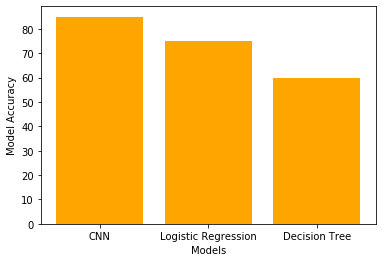

In [35]:
models = ["CNN","Logistic Regression","Decision Tree"]
accuracies = [85,75,60]
plt.bar(models,accuracies,color='orange')
plt.xlabel('Models')
plt.ylabel('Model Accuracy')